## Градиентный спуск

Градиентный спуск — это итерационный метод оптимизации функции. Основная идея заключается в том, чтобы двигаться в направлении наискорейшего убывания функции (это направление противоположно градиенту функции) и таким образом находить локальный минимум функции.

Для функции $f(x)$, градиент в точке $x$ обозначается как $\nabla f(x)$ и представляет собой вектор, элементами которого являются частные производные функции:

$$ \nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n} \right) $$

На каждом шаге итерации, значение $x$ обновляется следующим образом:

$$ x_{new} = x_{old} - \alpha \nabla f(x_{old}) $$

где $\alpha$ — это скорость обучения или размер шага.

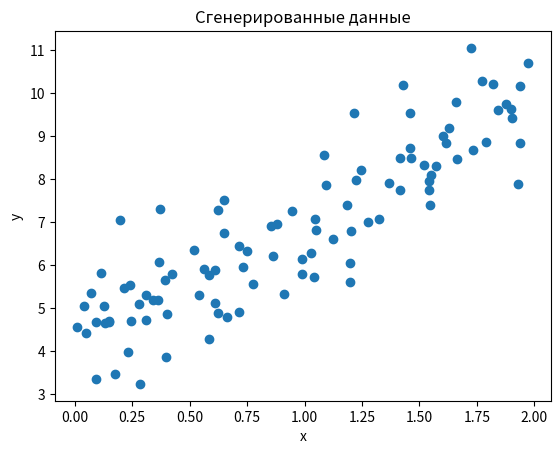

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Генерация данных
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Визуализация данных
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сгенерированные данные')
plt.show()

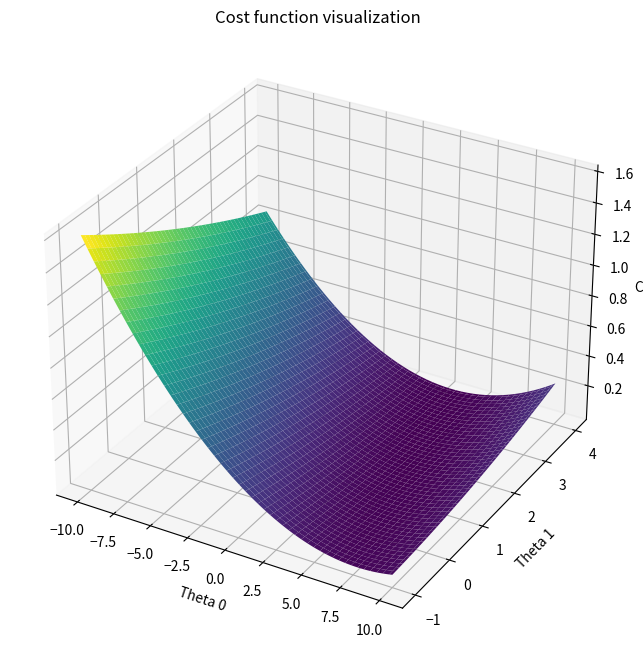

In [ ]:
def compute_cost(theta0, theta1, x, y):
    m = len(y)
    predictions = theta0 + theta1 * x
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

T0, T1 = np.meshgrid(theta0, theta1)
J_vals = np.array([compute_cost(t0, t1, x, y) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
J_vals = J_vals.reshape(T0.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('Cost function visualization')
plt.show()

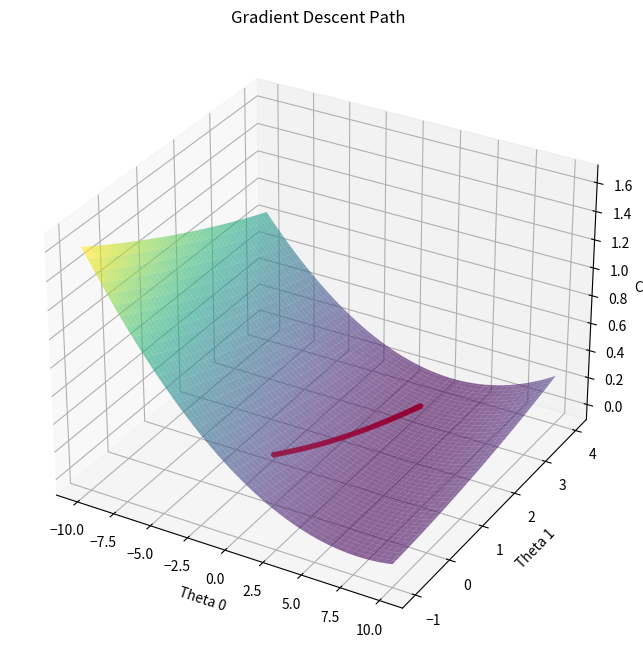

In [ ]:
def gradients(theta0, theta1, x, y):
    m = len(y)
    predictions = theta0 + theta1 * x
    dtheta0 = (1/m) * np.sum(predictions - y)
    dtheta1 = (1/m) * np.sum((predictions - y) * x)
    return dtheta0, dtheta1

def gradient_descent(x, y, learning_rate=0.01, iterations=100):
    theta0 = 0
    theta1 = 0
    history = []
    for _ in range(iterations):
        history.append((theta0, theta1))
        dtheta0, dtheta1 = gradients(theta0, theta1, x, y)
        theta0 = theta0 - learning_rate * dtheta0
        theta1 = theta1 - learning_rate * dtheta1
        
    return theta0, theta1, history

theta0_final, theta1_final, history = gradient_descent(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', alpha=0.6)
ax.scatter([item[0] for item in history], [item[1] for item in history], [compute_cost(item[0], item[1], x, y) for item in history], color='r', s=10)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('Gradient Descent Path')
plt.show()

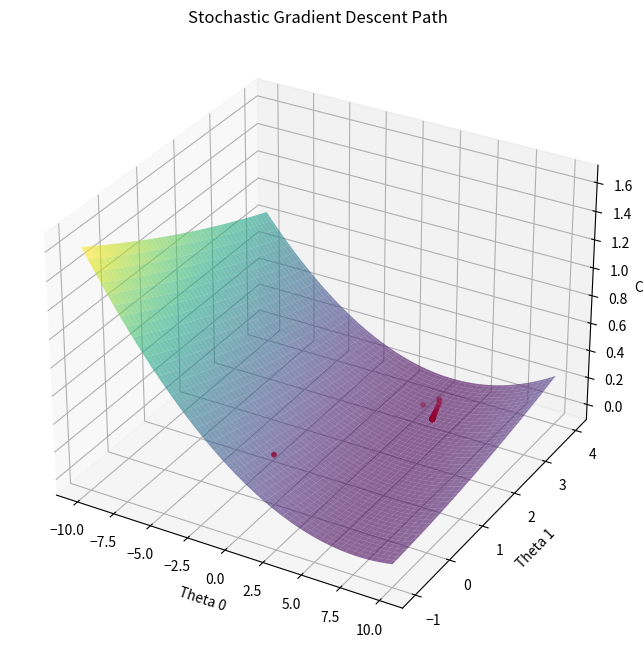

In [ ]:
def stochastic_gradient_descent(x, y, learning_rate=0.01, iterations=100):
    m = len(y)
    theta0 = 0
    theta1 = 0
    history = []
    for _ in range(iterations):
        history.append((theta0, theta1))
        for i in range(m):
            xi = x[i:i+1]
            yi = y[i:i+1]
            dtheta0, dtheta1 = gradients(theta0, theta1, xi, yi)
            theta0 = theta0 - learning_rate * dtheta0
            theta1 = theta1 - learning_rate * dtheta1
        
    return theta0, theta1, history

theta0_sgd, theta1_sgd, history_sgd = stochastic_gradient_descent(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', alpha=0.6)
ax.scatter([item[0] for item in history_sgd], [item[1] for item in history_sgd], [compute_cost(item[0], item[1], x, y) for item in history_sgd], color='r', s=10)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('Stochastic Gradient Descent Path')
plt.show()

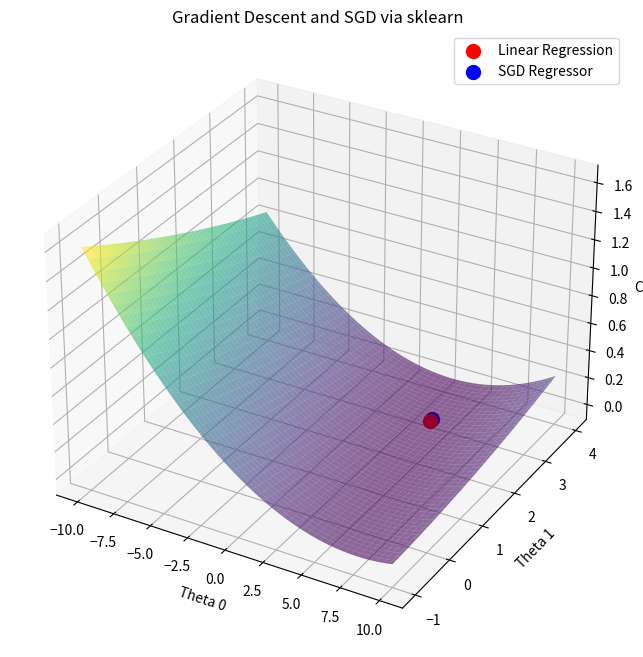

In [ ]:
from sklearn.linear_model import SGDRegressor, LinearRegression
# Градиентный спуск через sklearn
lin_reg = LinearRegression()
lin_reg.fit(x, y.ravel())
theta0_lin = lin_reg.intercept_
theta1_lin = lin_reg.coef_[0]

# Стохастический градиентный спуск через sklearn
sgd_reg = SGDRegressor(max_iter=100, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(x, y.ravel())
theta0_sgd_sklearn = sgd_reg.intercept_[0]
theta1_sgd_sklearn = sgd_reg.coef_[0]

# Визуализация пути градиентного спуска и стохастического градиентного спуска через sklearn
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', alpha=0.6)
ax.scatter(theta0_lin, theta1_lin, compute_cost(theta0_lin, theta1_lin, x, y), color='r', s=100, label='Linear Regression')
ax.scatter(theta0_sgd_sklearn, theta1_sgd_sklearn, compute_cost(theta0_sgd_sklearn, theta1_sgd_sklearn, x, y), color='b', s=100, label='SGD Regressor')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('Gradient Descent and SGD via sklearn')
ax.legend()
plt.show()